In [152]:
# Import external script
%run models.py

In [76]:
# Import data from CSV
fdata = pd.read_csv('data_histories.csv', index_col="dp_folio")
fdata.head()

,id_sexo,Aedad,AAedad,Apuesto,id_gestud,AIMC,fuma,fuma_act,ejer_act,ejer1,...,locout5,locout10,locout20,locout30,rest_act,rest1,rest5,rest10,rest20,rest30
dp_folio,,,,,,,,,,,,,,,,,,,,,
1,F,51,6,Admin,CarTec,4,1,3,0,2,...,1,1,1,1,0,0,0,0,0,0
2,F,38,4,Sec,Bach,3,2,-1,0,0,...,0,0,0,0,1,3,0,0,0,0
3,F,34,3,Int,Sec,5,1,1,0,0,...,1,-1,-1,-1,0,0,0,-1,-1,-1
4,M,63,8,Jef,CarTec,4,2,-1,2,2,...,0,0,0,-1,0,0,0,0,0,0
5,M,42,4,EM,Sec,3,1,2,2,2,...,0,0,0,0,0,0,0,0,0,0


In [153]:
pm = ProbModel()

In [140]:
# Clusterize between obese and non obese
obesity = {0:[1,2,3], 1:[4,5,6]}
ndata = pm.clusterize_discrete("AIMC", obesity, "obesity", fdata)

# Clusterize excercise features
ejer = {"A":"greatereq_than(2.5)", "B":"less_than(2.5)"}
ndata = pm.clusterize_continuous("ejer_act", ejer, "ejer0B", ndata)
ndata = pm.clusterize_continuous("ejer1", ejer, "ejer1B", ndata)
ndata = pm.clusterize_continuous("ejer5", ejer, "ejer5B", ndata)
ndata = pm.clusterize_continuous("ejer10", ejer, "ejer10B", ndata)
ndata = pm.clusterize_continuous("ejer20", ejer, "ejer20B", ndata)
ndata = pm.clusterize_continuous("ejer30", ejer, "ejer30B", ndata)

# Clusterize weight features
condi = {"A":[4,5], "B":[1,2,3]}
ndata = pm.clusterize_discrete("condi_act", condi, "condi0B", ndata)
ndata = pm.clusterize_discrete("condi1", condi, "condi1B", ndata)
ndata = pm.clusterize_discrete("condi5", condi, "condi5B", ndata)
ndata = pm.clusterize_discrete("condi10", condi, "condi10B", ndata)
ndata = pm.clusterize_discrete("condi20", condi, "condi20B", ndata)
ndata = pm.clusterize_discrete("condi30", condi, "condi30B", ndata)

ndata = pm.group_list_of_variables(["ejer0B", "ejer1B", "ejer5B", "ejer10B"], "ejerHistory", ndata)
ndata = pm.group_list_of_variables(["condi0B", "condi1B", "condi5B", "condi10B", "condi20B", "condi30B"], "condiHistory", ndata)

In [141]:
selected_features = ["ejer0B", "ejer1B", "ejer5B", "ejer10B", "ejerHistory", "obesity"]
query_features = ["ejer0B", "ejer1B", "ejer5B", "ejer10B"]
sdata = ndata[selected_features]
sdata.head()

,ejer0B,ejer1B,ejer5B,ejer10B,ejerHistory,obesity
dp_folio,,,,,,
1,B,B,B,B,BBBB,1
2,B,B,A,A,BBAA,0
3,B,B,B,A,BBBA,1
4,B,B,A,A,BBAA,1
5,B,B,B,B,BBBB,0


In [142]:
rdata = sdata[(ndata.ejer20B != "N") & (ndata.ejer10B != "N") & (ndata.ejer5B != "N") & (ndata.ejer1B != "N") & (ndata.ejer0B != "N")]
rdata

,ejer0B,ejer1B,ejer5B,ejer10B,ejerHistory,obesity
dp_folio,,,,,,
1,B,B,B,B,BBBB,1
2,B,B,A,A,BBAA,0
4,B,B,A,A,BBAA,1
5,B,B,B,B,BBBB,0
6,A,B,B,B,ABBB,0
...,...,...,...,...,...,...
1076,B,B,B,A,BBBA,1
1077,A,A,B,B,AABB,0
1078,B,A,A,A,BAAA,0


In [154]:
validation = Validation(NB())

In [155]:
queries = {"ejer0B": ["A", "B"],
           "ejer1B": ["A", "B"],
           "ejer5B": ["A", "B"],
           "ejer10B": ["A", "B"],
          }

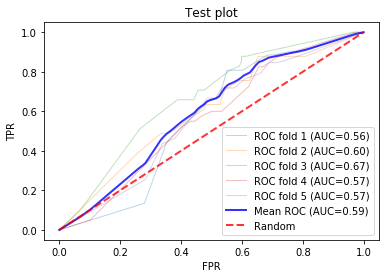

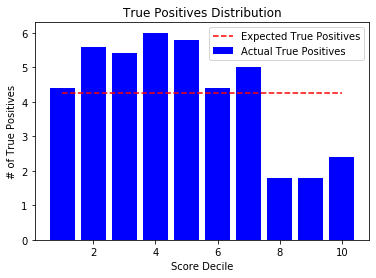

In [156]:
validation.run_cv(rdata, queries, "obesity", 1, 5, "Test plot")

In [160]:
validation.model.get_predicted_labels()

,predicted_obesity
7,1.0
10,0.0
12,1.0
15,1.0
19,0.0
...,...
1055,0.0
1065,1.0
1069,1.0
1074,0.0


In [148]:
buf = np.array(pm.string_generator("", ["A", "B"], 4)).flatten()
hist_posibilities = pm.string_padding("", buf, "")
hist_posibilities[4]

'ABAA'

In [149]:
queries = {"ejerHistory": hist_posibilities}

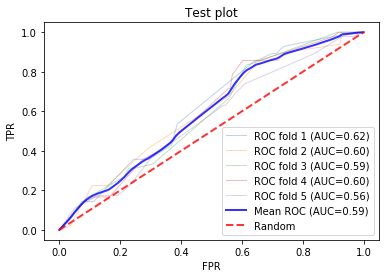

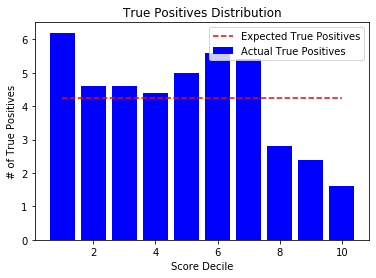

In [150]:
validation.run_cv(rdata, queries, "obesity", 1, 5, "Test plot")

In [151]:
validation.model.predicted_scores

,ejerHistory,total_score
7,0.224668,0.224668
8,-0.807595,-0.807595
14,0.224668,0.224668
25,0.224668,0.224668
28,0.224668,0.224668
...,...,...
1062,-1.30792,-1.307918
1064,-1.30792,-1.307918
1067,-0.807595,-0.807595
1075,0.348175,0.348175
